**link to github repository can be found [here]()**

**Introduction**

Taylor swift has been a country and pop sensation in the past decade, from being a small town girl next door to a ten time grammay award winner. WIth that being said she has also had a very scandalous reputatiion among other celebrities that has effected the way her music has changed and the style in which she write her music. In this projetct I sought to see how her music has chnaged oveer the here by analyzing the sentiment of her music from positive to negative and the subjectivity of her music from whether it was really personal to her verses if it could be objectively interpreted. Furthermore, I used her pop counter part selena gomez, someone who hasn't been as peutable in the hollywood spotlight as a baseline for comparison throughout this project. I went in with the intital predictions that the data would show that selena's music was more objectively focused had a mroe positive sentiment to it.  

**Data Collection**

The project consists of two datasets in which the observations consist of songs from artists selena gomez.  The observations include the song title the release year the lyrics of the song as well as the sentiment of the song on a range from -1 to 1 and the subjectivity of the song on a range of 0 to 1. The data was collected using a genius API for scraping song lyrics from their site. Genius provided this API key to people who register for their clients. I then used LyricGenius a python client created by John Miller for scraping and extracting the song lyrics. The raw data consisted of different topics such as whether or not the song had a feature on it, an annotation count, description, a featured video, the owner ID were all different things that were in this raw data all of this data can also be found on Genius.com if you look under these different artists page. And having their music on genius these artists obviously already consented to have their lyrics scrapes using the genius API. 

**Preprocessing/cleaning/labeling**

What I did to select the songs used in this project is that our use the lyric genius client to extract 99 songs from each of the artists that I was using during this project. These songs were saved into a Jason file which I then extracted only the songs from the artists and then dropped all the information that I did not need from the songs which was everything that wasn’t the lyrics and the release date and the title.  After doing that pre-processing I then use the text blog client and module to calculate the sentiment of the lyrics in the songs and then also save that into the data set. My raw source data, can be found in a json file along with this project. 
 

**Initial Dataset Problems:**

The data that I got from the json filed was packed with unecessary variable and regualr expressions that I stripped away. Not only that but there was so much information that didn't line up for each song so much that the arrays were not aligned and it was difficult for the pandas to read the json file so i just took out the songs dict and use that to create the dataframe

In [2]:
import numpy, pandas
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from scipy.special import comb
from scipy.stats import spearmanr

from textblob import TextBlob

import os
print(os.getcwd())

#pandas.read_csv('/Users/nahbumagana/Desktop/INFO2950/hw2/letter_frequency.csv')


/Users/nahbumagana/Desktop/Temporary Desktop/INFO2950/finalproject


In [4]:
taylor = pandas.read_csv('/Users/nahbumagana/Desktop/Temporary Desktop/INFO2950/finalproject/taylorswift.csv')
taylor.head()

,release_date,title,lyrics
0,2019,Lover,We could leave the Christmas lights up 'til J...
1,2017,Look What You Made Me Do,I don't like your little games Don't like you...
2,2017,End Game,I wanna be your end game I wanna be your firs...
3,2019,ME!,I promise that you'll never find another like...
4,2019,You Need To Calm Down,You are somebody that I don't know But you're...


In [5]:
import math, numpy


selena = pandas.read_csv('/Users/nahbumagana/Desktop/Temporary Desktop/INFO2950/finalproject/selenagomez.csv')

for x in range(0,99):
    if numpy.isnan(selena["release_date"][x]):
        selena["release_date"][x] = numpy.nan_to_num(selena["release_date"][x])
    selena["release_date"][x] = int(selena["release_date"][x])

selena["release_date"] = selena["release_date"].astype(int)

selena

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,release_date,title,lyrics
0,2019,Lose You To Love Me,You promised the world and I fell for it I pu...
1,2018,Back to You,Took you like a shot Thought that I could cha...
2,2017,Fetish,Take it or leave it Baby take it or leave it ...
3,2017,Bad Liar,I was walking down the street the other day T...
4,2019,Look At Her Now,Yeah They fell in love one summer A little ...
...,...,...,...
94,2014,A Year Without Rain (Dave Audé Radio Remix),Can you feel me when I think about you? With ...
95,2019,Roses,Roses Is Coming 🌹
96,2013,Come & Get It (Cosmic Dawn Club Remix),"So baby, whenever you're ready You ain't go..."
97,2019,Sweet Misery,I was lost And you were found You seemed to st...


In [6]:
def sentiments(df):
    sen = []
    for x in range(99):
        blob = str(df["lyrics"][x])
        blob0 = TextBlob(blob)
        loversentiment = blob0.sentiment
        sen.append(loversentiment[0])
    return sen        


def sub(df):
    sen = []
    for x in range(99):
        blob = str(df["lyrics"][x])
        blob0 = TextBlob(blob)
        loversentiment = blob0.sentiment
        sen.append(loversentiment[1])
    return sen    

In [10]:
sentiment = sentiments(taylor)
subjectivity = sub(taylor)
taylor = taylor.assign(sentiment=sentiment)
taylor = taylor.assign(subjectivity=subjectivity)


s_sentiment = sentiments(selena)
s_subjectivity = sub(selena)
selena = selena.assign(sentiment=s_sentiment)
selena = selena.assign(subjectivity=s_subjectivity)

**Sentiment Calculation and Subjectivity**

The Textblob module caluclates the sentiment of of song using polarity (from negative to positive on scale of -1 to 1 respectively) and subjectivity with a range 0 to 1where 0.0 is very objective and 1.0 is very subjective.

In [11]:
taylor.head()

,release_date,title,lyrics,sentiment,subjectivity
0,2019,Lover,We could leave the Christmas lights up 'til J...,0.308571,0.598571
1,2017,Look What You Made Me Do,I don't like your little games Don't like you...,-0.028656,0.506727
2,2017,End Game,I wanna be your end game I wanna be your firs...,-0.098562,0.361355
3,2019,ME!,I promise that you'll never find another like...,0.270833,0.641667
4,2019,You Need To Calm Down,You are somebody that I don't know But you're...,-0.003292,0.508539


In [13]:
selena.head()

,release_date,title,lyrics,sentiment,subjectivity
0,2019,Lose You To Love Me,You promised the world and I fell for it I pu...,0.347177,0.588479
1,2018,Back to You,Took you like a shot Thought that I could cha...,0.007727,0.208234
2,2017,Fetish,Take it or leave it Baby take it or leave it ...,0.198481,0.463711
3,2017,Bad Liar,I was walking down the street the other day T...,-0.128535,0.569444
4,2019,Look At Her Now,Yeah They fell in love one summer A little ...,0.166989,0.625029


**Findings**

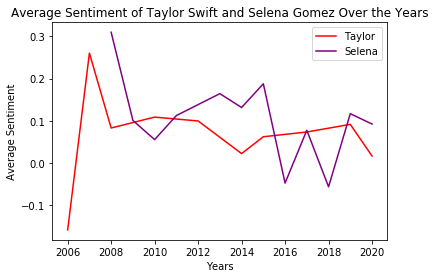

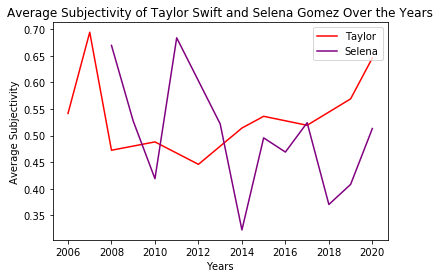

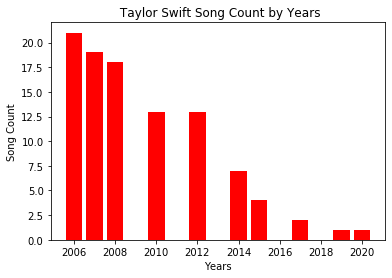

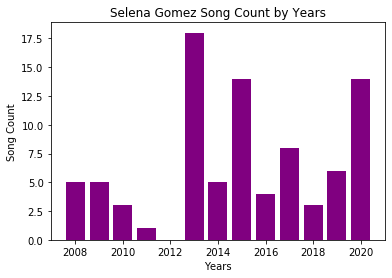

The average sentiment for Taylor Swift is: 0.06629993377375407
The average sentiment for Selena Gomez is: 0.10404370202338387
The standard deviation of sentiment for Taylor Swift is: 0.1627390588353329
The standard deviation of  sentiment for Selena Gomez is: 0.21103916690043306
The average subjectivity for Taylor Swift is: 0.5426295721966194
The average subjectivity for Selena Gomez is: 0.4937511966061982
The standard deviation of subjectivity for Taylor Swift is: 0.12353456453677619
The standard deviation of  subjectivity for Selena Gomez is: 0.1918628214965927


In [36]:


def getyears(df):
    years = []
    for x in range(99):
        year = df["release_date"][x]
        if year not in years:
            years.append(year)
    if 0 in years:
        years.remove(0)
    years = sorted(years)
    return years


def getaverage(df):
    years = getyears(df)
    yearaverages = []
    for x in years:
        sentiment = df.loc[df["release_date"] == x]
        mean = sentiment["sentiment"].mean()
        yearaverages.append(mean)
    return yearaverages

        
def getsub(df):
    years = getyears(df)
    yearaverages = []
    for x in years:
        sentiment = df.loc[df["release_date"] == x]
        mean = sentiment["subjectivity"].mean()
        yearaverages.append(mean)
    return yearaverages  
    
taylor_years = getyears(taylor)
taylor_average = getaverage(taylor)
taylor_sub = getsub(taylor)

selena_years = getyears(selena)
selena_average = getaverage(selena)
selena_sub = getsub(selena)


plt.plot(taylor_years, taylor_average, label="Taylor", color='red')

plt.plot(selena_years, selena_average, label="Selena", color='purple')
plt.title("Average Sentiment of Taylor Swift and Selena Gomez Over the Years")
plt.ylabel(' Average Sentiment ')
plt.xlabel('Years')
plt.legend(loc="upper right")
plt.show()


plt.title("Average Subjectivity of Taylor Swift and Selena Gomez Over the Years")
plt.plot(taylor_years, taylor_sub, label="Taylor", color='red')
plt.plot(selena_years, selena_sub, label="Selena", color='purple')
plt.ylabel(' Average Subjectivity ')
plt.xlabel('Years')
plt.legend(loc="upper right")
plt.show()


#print(taylor["release_date"].value_counts())
#print(selena["release_date"].value_counts())

selenacount = [5,5,3,1,18,5,14,4,8,3,6,14]


plt.bar(taylor_years, taylor["release_date"].value_counts(), align='center', color="red")
plt.ylabel('Song Count')
plt.xlabel('Years')
plt.title(' Taylor Swift Song Count by Years')
plt.show()

plt.bar(selena_years, selenacount, align='center', color="purple")
plt.ylabel('Song Count')
plt.xlabel('Years')
plt.title('Selena Gomez Song Count by Years')
plt.show()

print("The average sentiment for Taylor Swift is:", sum(taylor_average)/len(taylor_average))
print("The average sentiment for Selena Gomez is:", sum(selena_average)/len(selena_average))

print("The standard deviation of sentiment for Taylor Swift is:", taylor["sentiment"].std())
print("The standard deviation of  sentiment for Selena Gomez is:", selena["sentiment"].std())


print("The average subjectivity for Taylor Swift is:", sum(taylor_sub)/len(taylor_sub))
print("The average subjectivity for Selena Gomez is:",sum(selena_sub)/len(selena_sub))

print("The standard deviation of subjectivity for Taylor Swift is:", taylor["subjectivity"].std())
print("The standard deviation of  subjectivity for Selena Gomez is:", selena["subjectivity"].std())



**Sentiment Analysis**

There are few circumstances that should be acknowledged before anlyzing this data. The songs that were sampled were randomly selected from Genius's site thus they were distributed over the years. Some years have less song than other and this can be attributed to the fact that the artist was not as active during those year and due to the randomness of the data scraping. Looking at the years with the most song from both artists which is around 2013-2014 we can see that Taylor's music and sentiment what noticebly more negative than Selena. While I orignially though Selena's subjectivity and sentiment were going to be more consistent than Taylor's they varied alot more as you can see from the summary statistics. Although my original assumption of Selena being more positve than taylor over all and more subjective still holds true. Likewise, Selena Gomez's song lyrics are a lot more personal to her than


**What Happened in 2008 for Taylor Swift?**

As we can see from the song counts chart, most of the songs record come from 2006, 2007, and 2009, with almost no songs from 2009. IT was at the cusp of 2008 when Taylor Swift's media altercations began with a conflict with Kanye West at the VMA's. A time line of that scandal altercation from there can be found [here](https://www.highsnobiety.com/p/kanye-west-taylor-swift-beef-timeline/). While there are no songs recorded in 2009, the sentiment of Taylor Swift's songs took a deep dive at that point and plateaued off to a lower count. Although this project focuses on Taylor Swift there is really nothing I can account for the changes in her song sentiment which would have been another thing to explore throughout this project. Likewise while Taylor's subjectivity also took a deep dive, it slowly rose again over the years (this dive could be attributed to the fact that there are no songs recorded for 2009). One could assume that the topics she sang about were more personal to her, her album "Reputation" is a prime example of that.

**Evaluating Significance** 

I wanted to test how significant or proficient the Textblob moduele was for eevaluating sentiment by creating a simulation of random sentences and then testing how many positive to negative sentences in a trial of 100.  While I also tried to test for subjectivity, the spectrum of 0 to 1 is a little bit more difficult to interpret rather than -1 to 1. The simulation more or less ended up being comprable to the ratio of positive songs to negative songs from Taylor Swift and Selena Gomez. For the most part, given that 60% of the sentences were positive and the other negative and Taylor had 67% positive and 33% positive it can be assumed that the module was effective and wasn't just attributed to randomness. While Selena Gomez's number are a little bit mroe divergent in terms of positive to negative songs, it would be more resonsable to attribute her calulation to randomness but not completely. 

funny puppy runs foolishly.
dirty monkey hits merrily.
stupid girl runs occasionally.
stupid boy runs crazily.
stupid boy hits occasionally.
dirty car jumps crazily.
cool puppy drives foolishly.
funny car jumps merrily.
stupid rabbit hits merrily.
funny rabbit hits occasionally.
stupid puppy drives sarcasticaly.
cool monkey jumps sarcasticaly.
dirty girl drives occasionally.
cool boy jumps sarcasticaly.
cool puppy barfs merrily.
cool monkey runs merrily.
stupid girl hits foolishly.
adorable boy hits occasionally.
stupid puppy runs sarcasticaly.
dirty rabbit barfs merrily.
adorable puppy hits merrily.
cool girl drives merrily.
stupid puppy hits foolishly.
cool car drives foolishly.
stupid boy barfs foolishly.
cool girl drives foolishly.
cool monkey jumps sarcasticaly.
stupid car barfs merrily.
adorable girl jumps merrily.
cool boy hits occasionally.
dirty boy drives foolishly.
cool boy runs occasionally.
stupid girl drives crazily.
dirty rabbit jumps crazily.
adorable boy runs occasiona

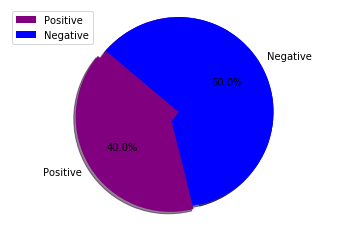

In [49]:
import random

def make_random_sentence():
  nouns = ["puppy", "car", "rabbit", "girl", "monkey", "boy"]
  verbs = ["runs", "hits", "jumps", "drives", "barfs"]
  adv = ["crazily.", "sarcasticaly.", "foolishly.", "merrily.", "occasionally."]
  adj = ["adorable", "funny", "dirty", "cool", "stupid"]
  random_entry = lambda x: x[random.randrange(len(x))]
  return " ".join([random_entry(adj), random_entry(nouns), random_entry(verbs), random_entry(adv)])


neg_count = 0
pos_count = 0
for x in range(100):
    line = make_random_sentence()
    print(line)
    analysis = TextBlob(line)
    if analysis.sentiment[0] > 0.0:
        pos_count += 1
    if analysis.sentiment[0] < 0.0:
         neg_count += 1
print(pos_count/100)
print(neg_count/100)

labels = 'Positive', 'Negative'
sizes = [pos_count, neg_count]
colors = [ 'purple', 'blue']
explode = (0.1,  0)  # explode 1st slice
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Taylor Swift All Song's Word Cloud


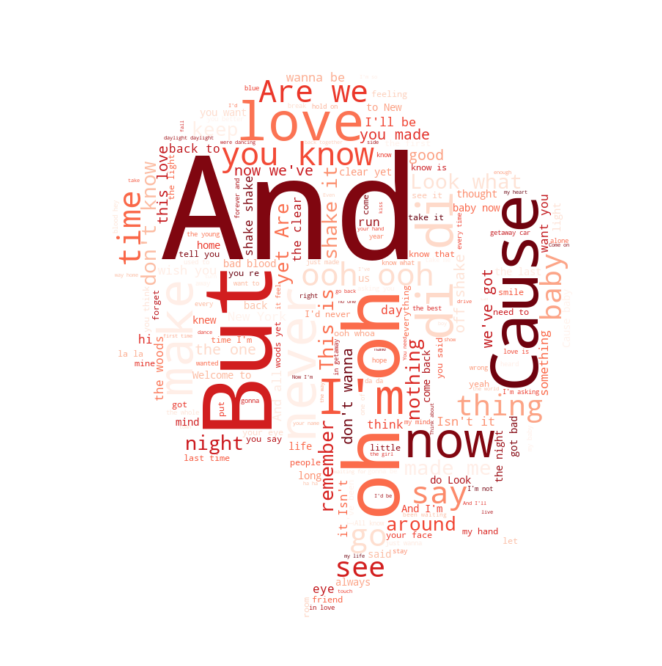

0.67
0.32


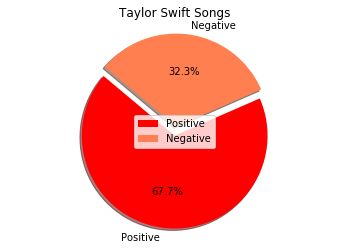

In [54]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib
import requests
print("Taylor Swift All Song's Word Cloud")

mask = numpy.array(Image.open(r'/Users/nahbumagana/Desktop/Temporary Desktop/INFO2950/finalproject/taylor.png'))


taylor_text = taylor["lyrics"].str.cat(sep=' ')
wordcloud = WordCloud(width=1080, height=600, background_color="white", stopwords=STOPWORDS,  colormap="Reds_r", mask=mask).generate(taylor_text)

plt.figure(figsize=(18,12),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

neg_count = 0
pos_count = 0

for x in range(99):
    line = taylor["lyrics"][x]
    analysis = TextBlob(line)
    if analysis.sentiment[0] > 0.0:
        pos_count += 1
    if analysis.sentiment[0] == 0.0:
        neu_count +=1 
    if analysis.sentiment[0] < 0.0:
         neg_count += 1

print(pos_count/100)
print(neg_count/100)



labels = 'Positive', 'Negative'
sizes = [pos_count, neg_count]
colors = [ 'red', 'coral']
explode = (0.1,  0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Taylor Swift Songs")
plt.legend(labels, loc="center")
plt.axis('equal')
plt.show()

Selena Gomez All Song's Word Cloud


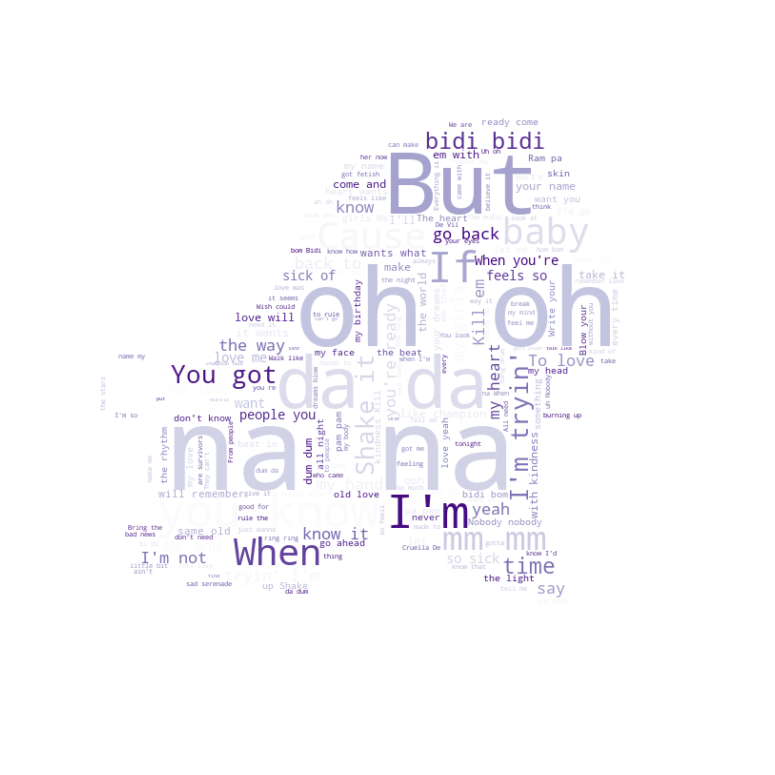

0.71
0.22


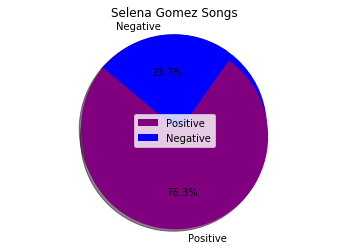

In [55]:
print("Selena Gomez All Song's Word Cloud")
selena_text = selena["lyrics"].str.cat(sep=' ')                                        

mask = numpy.array(Image.open(requests.get('https://d2gg9evh47fn9z.cloudfront.net/800px_COLOURBOX9690247.jpg', stream=True).raw))

wordcloud = WordCloud(width=1080, height=600, background_color="white", stopwords=STOPWORDS,  colormap="Purples_r", mask=mask).generate(selena_text)
                                        
plt.figure(figsize=(20,14),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



neg_count = 0
pos_count = 0

for x in range(99):
    line = selena["lyrics"][x]
    analysis = TextBlob(line)
    if analysis.sentiment[0] > 0.0:
        pos_count += 1
    if analysis.sentiment[0] == 0.0:
        neu_count +=1 
    if analysis.sentiment[0] < 0.0:
         neg_count += 1

print(pos_count/100)
print(neg_count/100)


# Data to plot
labels = 'Positive', 'Negative'
sizes = [pos_count, neg_count]
colors = [ 'purple', 'blue']
explode = (0.1,  0)  # explode 1st slice
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Selena Gomez Songs")
plt.legend(labels, loc="center")
plt.axis('equal')
plt.show()

**Conclusions**
While I found that comparitively, Selena Gomez's songs were both more subjective and positive than Taylor Twifts song's, its obvious that while Taylor Swift showed a more consistent palteau after a certain rise or drop in the data. One could assume from this that taylor swifts songs go more negative and personal to her own feelings and situations. In the word clouds I have displayed you can see how the most frequent words used in Taylor's song use pronoun and verbs like "I'm" and "love" where a lot of the words in Selena's songs are onomatopoeia like words meant for dancing and humming along. This again speaks to the subjectivity and sentiment of the songs. A few thigns that i could have done better is collecting songs at an equitable amount per year and staandardizing the different time in which taylor and selena made songs. Also including mroe songs over all would've been helpful. In terms of contexts, evaluating Selena's background and how the media and her personal life was also affecting her could've played a vital part in her steep fluctuation in sentiment and subjectivity. While that may not be as important at looking at the actual number, these artists are being influenced by the thing that happen to them and their experiences which is why Taylor's connection to her scandals played such a role in the development of her music

**Acknowledgements**

I would like to thank Genius for allowing me to scrape song lyrics from their website, John Miller for creating a [client](https://github.com/johnwmillr/LyricsGenius) called "LyricGenius" to help me extract these song lyrics and create a csv. I would also like to acknowledge the use of TextBlob and WordCloud as they really help contribute to the manifestation of this project as well as [Rahul Vaish](https://medium.com/@rahulvaish/textblob-and-sentiment-analysis-python-a687e9fabe96) whose [medium](https://medium.com/@rahulvaish/textblob-and-sentiment-analysis-python-a687e9fabe96) article inspired the idea for this project. I would like to thank this stackoverflow [question](https://stackoverflow.com/questions/29938804/generate-random-sentences-in-python) for helping me to generate random sentences as I was truly lost as to how to create a simulation. Finally I would like to thank my mentor for this project, Alan Ai, who helped me find direction and purpose despite my lack of motivation to complete the project and Professor Mimno who gave us a great semester regardless of COVID
